# 1. Introduction
NFL is one of the biggest sports in the USA and analytics have a great impact on this sport as a number of plays are picked each game by looking at numbers. This game is about scoring more points than the rival team, to do so you have to get the ball from your field to the rival's endzone so you have to try getting the best out of every chance to move the ball.
Of course there are different ways to carry the ball to the rival's endzone, you either do it by passing it in the air to a teammate or you can also carry the ball through the ground by running with it, this is something we'll look into it to see what is better.
In order to analyze the different stats that an NFL game gives us we'll be using the dataset [NFL Box Scores](https://www.kaggle.com/grayengineering425/nfl-box-scores), there are two datasheets in this link and we'll be using the *box_scores.csv* to get our data.

# 2. Explaining the game
Before we look into our data, why not get familiar with the game of football (or american football for us the europeans)?
There are two teams competing for victory in a 120 yards (109.7m) long field although it really is 100 yards (91.44m) as 20 yards are the endzones and no plays are seen there, it's just there for scoring.
Let's dive into a simple list of features of the game:
-   **Objective:** Get the ball to the rival's endzone
-   **Game Time:** There are 4 playing windows called quarters that are 15 minutes long each
-   **How to get to the endzone:** When you are on the attack there are 4 opportunities to travel 10yards with the ball (either by air or by ground), this opportunities are called downs.
-   **Scoring:** You get 6 points for getting the ball to the endzone (**TOUCHDOWN!**) or 3 points if you score a field goal kick (with the feet, like us europeans!!). You also can kick an extra point or go for 2 points when a touchdown is scored, so the possiblities are: 3,6,7 or 8 points in an attacking play. When you are defending you can score by intercepting a pass or taking the ball away from your rival and getting it to the endzone, that would be anooother **TOUCHDOWN** but if you tackle an attacker on their endzone you will score 2 points.
-   **Drawing:** If no team is winning by the end of the 4th quarter we go into overtime: another 15 minute quarter where the first team to score a touchdown gets the win, or if no touchdown is scored the win will go to the team that has a greater score by the end of the overtime period. But what if at the end of this 15 extra minutes we still see a draw? The game ends with a draw at pro level while in college you could get a 10 quarter game because someone has to win.

<div style="text-align:center" markdown="1">
   <img src="https://i.giphy.com/media/xUPGcB5L0TIfLrDH8c/giphy.webp">
</div>

# 3. Dependencies
Let's talk about the libraries and files that you will need to run this notebook.
-  **OS and Pathlib**: necessary to get our data file.
-  **Pandas**: all data and matrix operations, without it we will be very limited.
-  **Sklearn**: helpful to split the data and use our model.
-  **Seaborn**: will be used to plot the data.
-  **ingest_data.py**: in this file there are the read data functions
-  **generate_features.py**: file that gets the data from the previous file and creates the desired features, this dataset needed a lot of cleaning as there are tons of features that have types that cannot be used.


In [23]:
import os
from pathlib import Path
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,  precision_score, recall_score, roc_curve,roc_auc_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

from time import time

import ingest_data as id
import generate_features as gf

# 4. Let's look at our data
The first thing we have to do when looking at a problem is to understand the data, if you know what you are talking about it will provide further knowledge or if you don't have a clue about it then you will get a baseline and understand how the data is related. In this case we are going to take a look into the base data without cleaning it and its types.

In [13]:
games, weather = id.read_data()
print('Total entrances:', games.shape[0], '.')
print('Total fields for each entrance:', games.shape[1], '.')

Total entrances: 4328 .
Total fields for each entrance: 57 .


We have recorded 4328 game from 2002 to 2016, that difference in years is to account for the possiblity that a team has gotten pretty good over a certain amount of time which would balance the data towards their end as road upsets tend to be less probable in the NFL, we have 57 types of data from these games so the next step is to dive into this recorded data.

In [14]:
pd.set_option('display.max_columns', None)
games.head(5)

,date,visitor,home,visitor_score,home_score,visitor_first_downs,visitor_rushing_first_downs,visitor_passing_first_downs,visitor_penalties,visitor_net_yards,visitor_net_yards_rushing,visitor_rushing_plays,visitor_avg_rush,visitor_net_yards_passing,visitor_passing_splits,visitor_sack_splits,visitor_gross_passing,visitor_yards_per_pass,visitor_punt_splits_avg,visitor_punts_blocked,visitor_punt_return_splits,visitor_kick_return_splits,visitor_int_return_splits,visitor_penalty_splits,visitor_fumble_splits,visitor_field_goals,visitor_third_down_splits,visitor_fourth_down_splits,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,home_first_downs,home_rushing_first_downs,home_passing_first_downs,home_penalties,home_net_yards,home_net_yards_rushing,home_rushing_plays,home_avg_rush,home_net_yards_passing,home_passing_splits,home_sack_splits,home_gross_passing,home_yards_per_pass,home_punt_splits_avg,home_punts_blocked,home_punt_return_splits,home_kick_return_splits,home_int_return_splits,home_penalty_splits,home_fumble_splits,home_field_goals,home_third_down_splits,home_fourth_down_splits,home_total_plays,home_avg_gain,home_time_of_possession
0,"September 7, 2014",Cleveland,Pittsburgh,27,30,23,9,11,3,389,191,31,6.2,198,30-18-0,3-24,222,7.4,7-44.9,0.0,1-0,4-85,1-0,8-55,0-0,2-2,2-11-18%,0-0-0%,64,6.1,27:33,24,6,16,2,503,127,29,4.4,376,35-24-1,3-14,390,11.1,6-43.7,0.0,3-46,2-29,0-0,11-96,1-0,3-3,4-12-33%,1-1-100%,67,7.5,32:27
1,"September 7, 2014",Jacksonville,Philadelphia,17,34,18,2,14,2,306,64,24,2.7,242,43-24-0,3-24,266,6.2,8-46.5,0.0,3-28,2-36,1-0,7-55,1-1,1-3,2-14-14%,0-1-0%,70,4.4,29:14,24,7,14,3,420,145,32,4.5,275,45-27-1,5-47,322,7.2,6-38.3,0.0,4-62,1-24,0-0,6-50,3-2,2-2,8-19-42%,1-1-100%,82,5.1,30:46
2,"September 4, 2014",Green Bay,Seattle,16,36,19,4,13,2,255,80,21,3.8,175,33-23-1,3-14,189,5.7,4-38.2,0.0,0-0,4-89,0-0,8-65,1-0,1-1,6-12-50%,0-1-0%,57,4.5,26:40,25,13,8,4,398,207,37,5.6,191,28-19-0,1-0,191,6.8,2-33.0,0.0,2-3,3-60,1-21,4-69,2-1,2-2,4-11-36%,1-1-100%,66,6.0,33:20
3,"September 7, 2014",Minnesota,St. Louis,34,6,18,6,10,2,355,185,32,5.8,170,25-17-0,0-0,170,6.8,5-47.4,0.0,1-6,2-48,2-81,7-60,2-0,2-2,3-12-25%,0-0-0%,57,6.2,28:17,15,4,10,1,318,72,22,3.3,246,36-24-2,5-27,273,7.6,6-46.5,0.0,5-24,1-26,0-0,13-121,4-0,2-3,4-14-28%,0-0-0%,63,5.0,31:43
4,"September 7, 2014",Cincinnati,Baltimore,23,16,16,4,11,1,380,79,26,3.0,301,38-25-0,0-0,301,7.9,4-37.8,0.0,1-45,0-0,1-1,4-45,0-0,5-6,4-14-28%,0-0-0%,64,5.9,30:30,26,8,16,2,423,94,20,4.7,329,62-35-1,3-16,345,5.6,4-42.2,0.0,2-2,4-109,0-0,3-29,2-1,1-2,8-17-47%,1-2-50%,85,5.0,29:30


Before talking about the data let's establish that when you read y_zzzzz_jjjj that "y" will either be home or visitor.
- y_net_yards_x where x can be passing or rushing and y is home or visitor: yards made by "y" team after taking away the penalty, sacks and safety yards.
- y_passing_splits: when we find a column that talks about splits it gives us information on the amount of passes a team completed or failed, or sacks-yards_per_sack or a completed-tried of FG and other stopped plays.
There are a lot of columns that we have to refactor or just delete because they don't give us relevant information like the "Date" and teams, NFL teams can change a lot from one season to another and it has not much sense to keep it, we also have to change those "split" columns we talked earlier as they don't provide clear useful data.
This is where "generate_features.py" comes handy because it transforms the data and returns a clean dataset that can be used to get correlations.

First step before returning our dataset is to check if there's null values and delete them, this is done in the same function as the feature generation and it will print the size of the sanitized dataset.

In [15]:
data = gf.generate_features()
pd.set_option('display.max_columns', None)
data.head(5)

Total entrances after dropping null values:  4328 .


,results,Home ToP,Away ToP,home Score,away Score,Home #Plays,Away #Plays,Home 1st,Away 1st,Home 1st P,Home 1st R,Away 1st P,Away 1st R,Home avg gain,Away avg gain,Home Net Y,Home Net P,Home Net R,Away Net Y,Away Net P,Away Net R,Home FG,Away FG,Home 3rd %,Away 3rd %,Home pens,Away pens
0,1,1947.0,1653.0,30,27,67,64,24,23,16,6,11,9,7.5,6.1,503,376,127,389,198,191,1.000000,1.000000,33,18,2,3
1,1,1846.0,1754.0,34,17,82,70,24,18,14,7,14,2,5.1,4.4,420,275,145,306,242,64,1.000000,0.333333,42,14,3,2
2,1,2000.0,1600.0,36,16,66,57,25,19,8,13,13,4,6.0,4.5,398,191,207,255,175,80,1.000000,1.000000,36,50,4,2
3,2,1903.0,1697.0,6,34,63,57,15,18,10,4,10,6,5.0,6.2,318,246,72,355,170,185,0.666667,1.000000,28,25,1,2
4,2,1770.0,1830.0,16,23,85,64,26,16,16,8,11,4,5.0,5.9,423,329,94,380,301,79,0.500000,0.833333,47,28,2,1


Happily there were no null values in the dataset so we can continue with our data exploration, in the next cell we'll see the results of the describe function.

In [16]:
data.describe()

,results,Home ToP,Away ToP,home Score,away Score,Home #Plays,Away #Plays,Home 1st,Away 1st,Home 1st P,Home 1st R,Away 1st P,Away 1st R,Home avg gain,Away avg gain,Home Net Y,Home Net P,Home Net R,Away Net Y,Away Net P,Away Net R,Home FG,Away FG,Home 3rd %,Away 3rd %,Home pens,Away pens
count,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,3774.000000,3701.000000,4328.000000,4328.000000,4328.000000,4328.000000
mean,1.430453,1831.425601,1795.512939,23.161969,20.608364,63.654575,62.925601,19.610213,18.604898,11.529113,6.340111,11.262708,5.795287,5.370032,5.182671,341.983133,223.804760,118.178373,327.165896,217.674908,109.490989,0.823774,0.812989,38.527264,36.841266,1.740989,1.546904
std,0.498453,274.126025,277.831744,10.362590,10.039708,8.374063,8.593751,4.948859,4.992492,3.929243,3.068336,3.985306,2.970334,1.133971,1.144733,83.477570,76.977626,52.183044,85.733649,78.534008,50.623461,0.294495,0.304601,13.964768,14.015525,1.419812,1.334203
min,1.000000,885.000000,893.000000,0.000000,0.000000,34.000000,34.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.600000,77.000000,6.000000,-3.000000,26.000000,-7.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1647.000000,1603.000000,16.000000,13.000000,58.000000,57.000000,16.000000,15.000000,9.000000,4.000000,8.000000,4.000000,4.600000,4.400000,284.000000,170.000000,81.000000,267.000000,161.750000,72.000000,0.666667,0.666667,28.750000,27.000000,1.000000,1.000000
50%,1.000000,1831.000000,1792.000000,23.000000,20.000000,64.000000,63.000000,20.000000,19.000000,11.000000,6.000000,11.000000,5.000000,5.300000,5.200000,340.000000,219.000000,112.000000,327.000000,214.000000,103.000000,1.000000,1.000000,38.000000,37.000000,2.000000,1.000000
75%,2.000000,2017.000000,1981.000000,30.000000,27.000000,69.000000,69.000000,23.000000,22.000000,14.000000,8.000000,14.000000,8.000000,6.100000,5.900000,397.000000,273.000000,149.000000,386.000000,270.000000,139.000000,1.000000,1.000000,50.000000,46.000000,3.000000,2.000000
max,3.000000,2781.000000,2828.000000,62.000000,59.000000,99.000000,93.000000,40.000000,37.000000,26.000000,21.000000,28.000000,19.000000,9.900000,10.200000,653.000000,522.000000,378.000000,626.000000,516.000000,351.000000,1.000000,1.000000,84.000000,91.000000,10.000000,8.000000


(array([2472.,    0.,    0.,    0.,    0., 1849.,    0.,    0.,    0.,
           7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

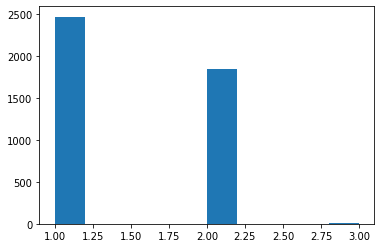

In [17]:
plt.figure()
plt.hist(data['results'])

There's a lot of deviation in our data, this will make the predictions harder but there's another step we need to do in refining our data and it is to check the columns that have a correlation with our objective variable which is result. Also worth noting the dataset doesn't feel too unbalanced.
To do this we will apply a filter with the **corr** function. 

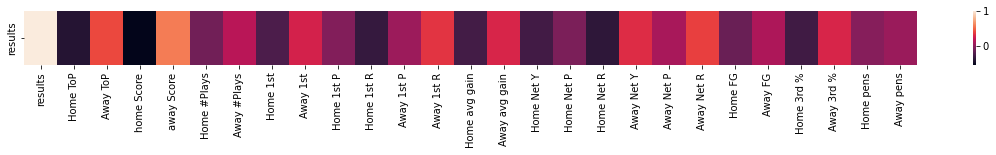

In [18]:
correlation = data.corr()['results'].to_frame().T
plt.subplots(figsize=(20,1))
sns.heatmap(correlation)
plt.show()

It is surprising that the Home team stats are the ones with less correlation with the result of the game, knowing that and also seeing that there's quite a low correlation with other stats I'll proceed to apply a threshold to further inspect the data.

In [19]:
thresh = 0.3
attr = list(filter(lambda x: abs(float(correlation[x])) > thresh, data.columns))
print('Total of useful attributes:', len(attr), '.')
for el in attr:
    print(el)


Total of useful attributes: 10 .
results
Home ToP
Away ToP
home Score
away Score
Home 1st R
Away 1st R
Home Net R
Away Net Y
Away Net R


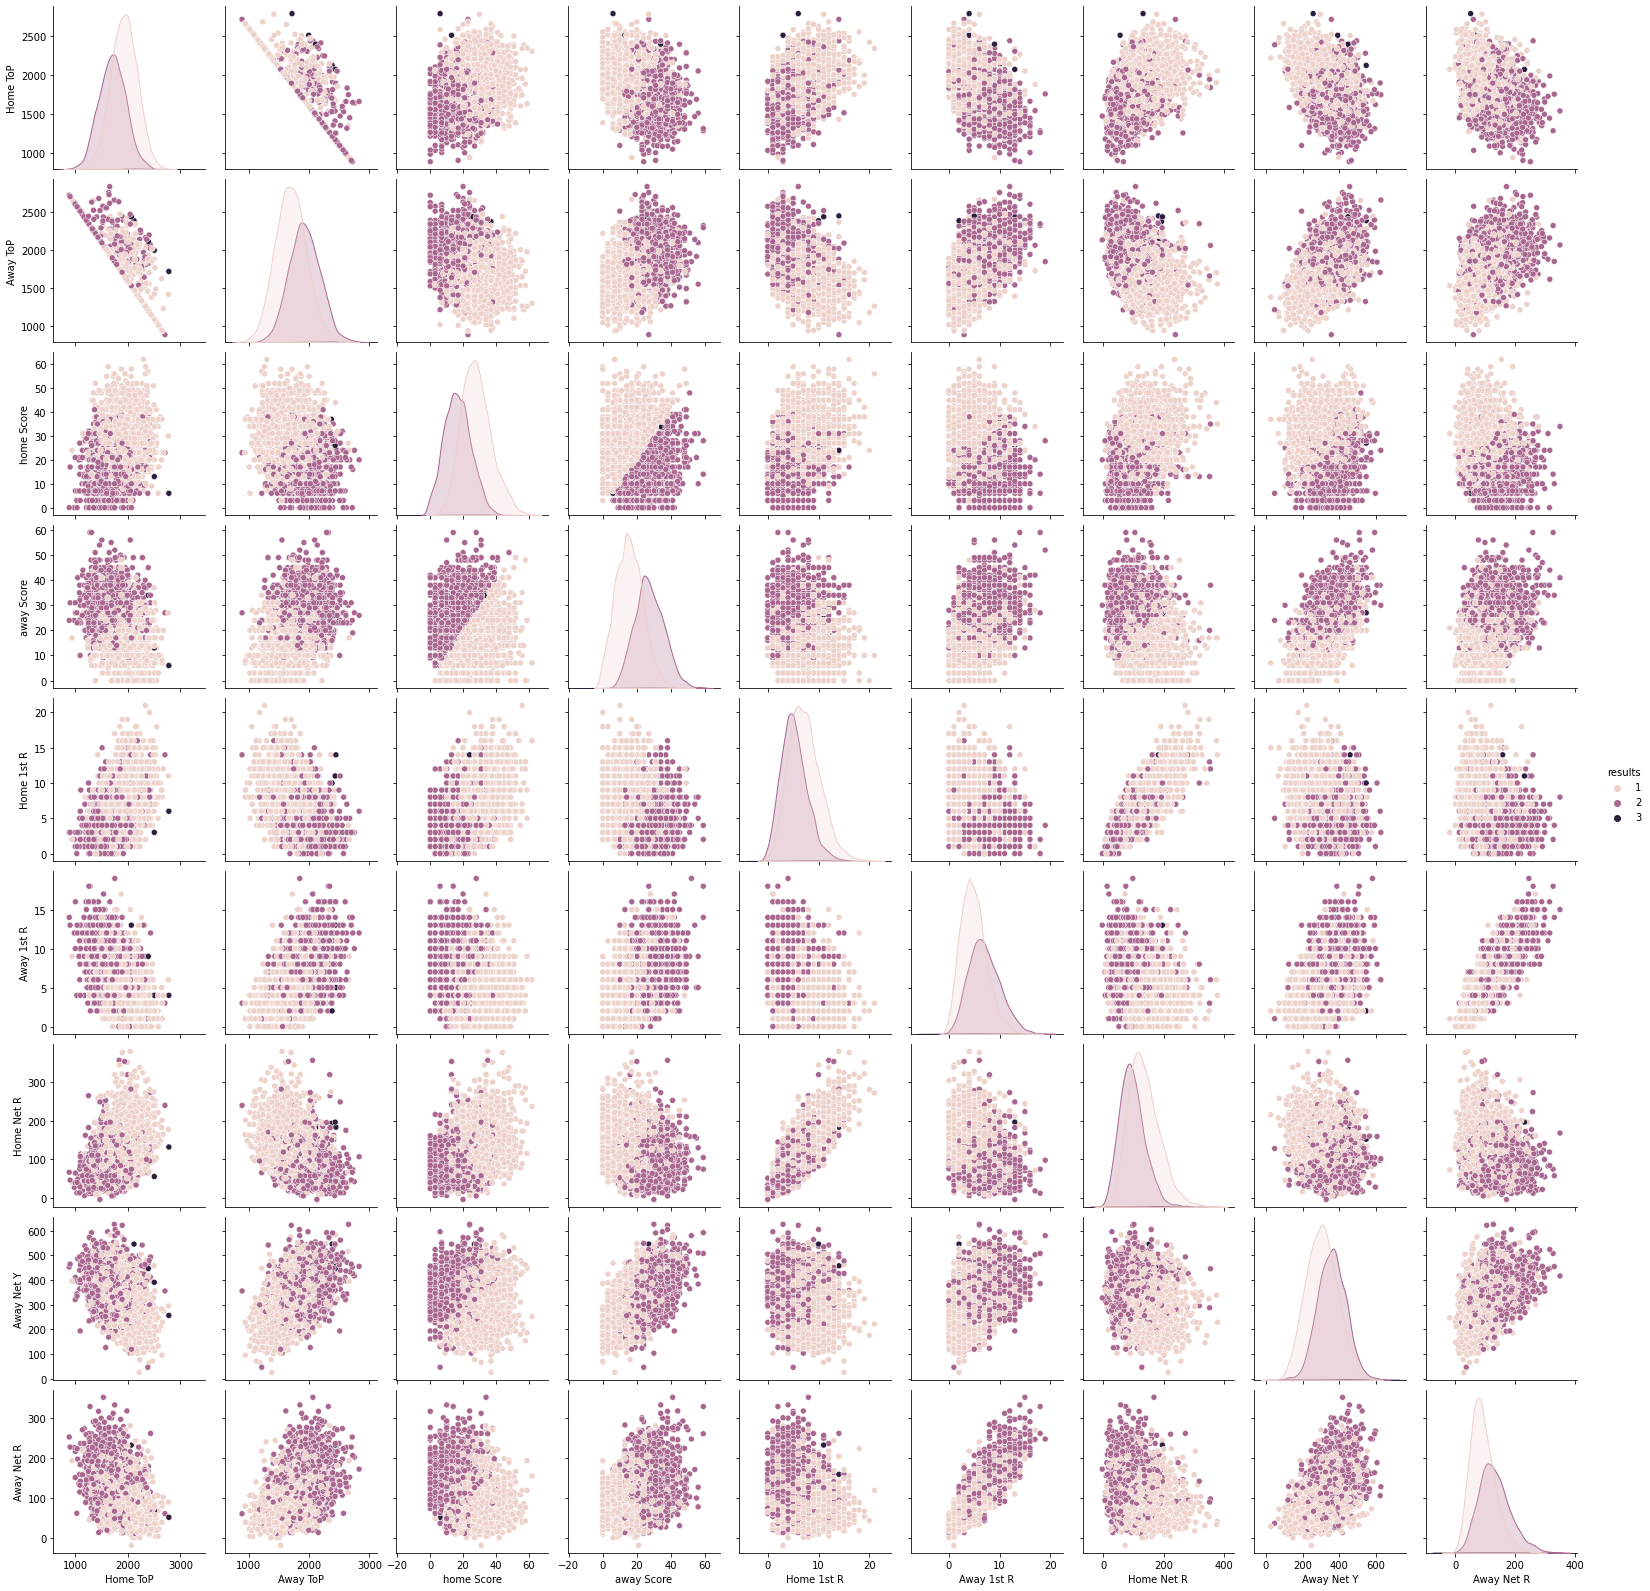

In [20]:
data = data[attr]
sns.pairplot(data, hue="results")

# 5. It's time to predict some games
My initial thoughts with this dataset was to see if the weather had an impact in the games, I couldn't do it as the weather dataset didn't have the same games as the one with the stats so I couldn't check if it had an impact, it was a shame so I focussed more in the offensive stats for both teams as it looks that offense stats are better for prediction rather than defensive even though low offensive production is often result of a great defense.

**5.1 Model Selection**
First things first, we need to talk about which models we are using to determine the results of a game, my intention is to use random forests, SVMs and KNN and then compare the three models to decide which one is the better of them all. 
SVMs might be an intersting choice with the usage of kernels.

**5.2 Data spli**
We'll be using cross-validation to train and test our data, specifically we are going to see the use of **Stratified K-Fold** to have a more balanced train and test sets.

**5.3 Metrics** 
The three metrics use to compare the results will be *accuracy, F1 and recall* which I believe will give a good information on the perfomance of our models.
Let's imagine a scenario to understand our metrics a bit more. We work for a marketing corporation that wants metrics on their advertisments, the three selected metrics would work like this.
*Accuracy*: % of times our model is right on whether a client wants to buy a product or not.
*Recall*: % of clients we are capable of correctly detect that would be interested in an offer.
*F1*: It would compare the precision and recall, that is how many times we were correct on a client wanting to buy our products *precision* and the *recall*. 

In [24]:
X = data.drop(labels=['results'], axis=1)
Y = data['results']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42, stratify=Y)


**SVM**
*Kernel Poly*

In [25]:
t0 = time()
linear = sk.svm.SVC(decision_function_shape='ovo',kernel='poly',degree=6, C=10).fit(x_train, y_train)
y_pred = linear.predict(x_test)
acc = sk.metrics.accuracy_score(y_test, y_pred)
f1 = sk.metrics.f1_score(y_test, y_pred, average='weighted')
mr = sk.metrics.recall_score(y_test, y_pred, average='macro')
print("Accuracy:",acc)
print("F1:",f1)
print("Recall:", mr)
print("Time in seconds:",time()-t0)

Accuracy: 0.8868033496967946
F1: 0.8860665391713565
Recall: 0.5901326582490788
Time in seconds: 0.06198000907897949


This kernel is giving really good accuracy and F1 but not a good recall, let's try another kernel to see if these results change, also worht noting that it is very quick in time.

In [26]:
t0 = time()
linear = sk.svm.SVC(decision_function_shape='ovo',kernel='rbf',degree=6, C=10).fit(x_train, y_train)
y_pred = linear.predict(x_test)
acc = sk.metrics.accuracy_score(y_test, y_pred)
f1 = sk.metrics.f1_score(y_test, y_pred, average='weighted')
mr = sk.metrics.recall_score(y_test, y_pred, average='macro')
print("Accuracy:",acc)
print("F1:",f1)
print("Recall:", mr)
print("Time in seconds:",time()-t0)

Accuracy: 0.745307536817788
F1: 0.7420783876637859
Recall: 0.4891928180916382
Time in seconds: 0.26691532135009766


Worse results, let's try a linear kernel and hope for the best of the three.

In [27]:
t0 = time()
linear = sk.svm.SVC(decision_function_shape='ovo',kernel='linear',degree=6, C=10).fit(x_train, y_train)
y_pred = linear.predict(x_test)
acc = sk.metrics.accuracy_score(y_test, y_pred)
f1 = sk.metrics.f1_score(y_test, y_pred, average='weighted')
mr = sk.metrics.recall_score(y_test, y_pred, average='macro')
print("Accuracy:",acc)
print("F1:",f1)
print("Recall:", mr)
print("Time in seconds:",time()-t0)

Accuracy: 0.9979786312445856
F1: 0.9972574559900254
Recall: 0.6664981462756994
Time in seconds: 0.08097457885742188


I am deeply surprised with the results of this model, I didn't expect such an increase.